In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
tf.__version__

'2.8.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/ComputerVision//4CNN/cat_dog_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

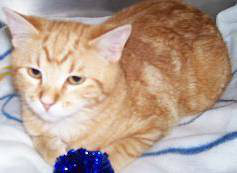

In [ ]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/cat/cat.42.jpg')

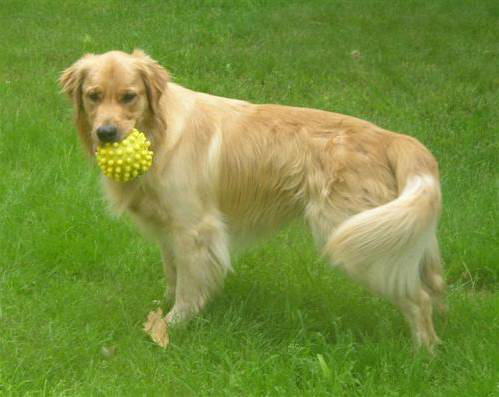

In [ ]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/dog/dog.66.jpg') # a way of visualizing your image
# dont cry now, its just tf works like that

In [ ]:
#this part we apply data augmentation, use ImageDataGenerator to apply augmentation to strenghten your data
training_generator = ImageDataGenerator(rescale=1./255,  # ( just scaling here nothing different)
#we dont need  augmentation for test images
                                        rotation_range=7,  #rotating range
                                        horizontal_flip=True,  #flip horiznotal, or can be vertical
                                        zoom_range=0.2)  #use zooming,  there are more paramters, check the function for that



'''image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )'''


train_dataset = training_generator.flow_from_directory('/content/cat_dog_2/training_set',  #take from directory inside our googledrive
                                                        target_size = (128, 128),  #size of images, if you put bigger sizes, will be longer  ( can increase the accuracy)
                                                        batch_size = 128,  #images will be taken 128 by 128. this is related to mini batch Gradient descent                                                 
                                                        class_mode = 'categorical',# we can also say binary, for this task , we will have 2 neurons in the end
                                                       #use categorical esspecially when you have more than 2 classes.
                                                       shuffle = True) #shuffle the data as we always did, use shuffle always, or NN will memorize the order

Found 4000 images belonging to 2 classes.


In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
train_dataset.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
# To test, we set this parameter to FALSE because when testing, 
# the order of the images makes no difference. 
# If we leave the value equals TRUE, we will not be able to associate the 
# predictions with the expected outputs
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/cat_dog_2/test_set',
                                                     target_size = (128, 128), #same size
                                                     batch_size = 1, #take one by one
                                                     class_mode = 'categorical',
                                                     shuffle = False) # this is test set, we dont need to shuffle, we dont!
                                                     #if you shuffle the test data, your expected outputs and actual output order will be problematic

Found 1000 images belonging to 2 classes.


In [ ]:
18496  # flatten layer

18496

In [ ]:
network = Sequential()
network.add(Conv2D(64, (3,3), input_shape = (128,128,3), activation='relu'))  #first part is conv layer, to set features to classify images, number of feature detectors=64


network.add(MaxPooling2D(pool_size=(2,2)))  # can be average pooling, but max pool is default

network.add(Conv2D(64, (3,3), activation='relu'))  #same story
network.add(MaxPooling2D(pool_size=(2,2))) #same

network.add(Conv2D(64, (3,3), activation='relu')) #same
network.add(MaxPooling2D(pool_size=(2,2))) #saame


network.add(Flatten())  # last part to make flatten

network.add(Dense(units = 9249, activation='relu'))  #your archictecture of DNN
network.add(Dense(units = 9249, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))  # can be sigmoid for binary, but you can use softmax when you have binary classification (DONT USE SIGMOID WHEN THERE ARE MORE THAN 2 CLASSES)
#if you use sigmoid, you will have 1 neuron in output layer. for softmax in this project its 2.

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = network.fit_generator(train_dataset, epochs=30, validation_data=test_dataset)  #history variable keeps the records of epochs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/30
32/32 [==============================] - 43s 946ms/step - loss: 1.4219 - accuracy: 0.5320 - val_loss: 0.6858 - val_accuracy: 0.5030
Epoch 2/30
32/32 [==============================] - 30s 938ms/step - loss: 0.6799 - accuracy: 0.5598 - val_loss: 0.6876 - val_accuracy: 0.5290
Epoch 3/30
32/32 [==============================] - 29s 907ms/step - loss: 0.6576 - accuracy: 0.5928 - val_loss: 0.6453 - val_accuracy: 0.6240
Epoch 4/30
32/32 [==============================] - 29s 917ms/step - loss: 0.6186 - accuracy: 0.6410 - val_loss: 0.6589 - val_accuracy: 0.6220
Epoch 5/30
32/32 [==============================] - 29s 922ms/step - loss: 0.6197 - accuracy: 0.6612 - val_loss: 0.6005 - val_accuracy: 0.6880
Epoch 6/30
32/32 [==============================] - 29s 912ms/step - loss: 0.5759 - accuracy: 0.7003 - val_loss: 0.6314 - val_accuracy: 0.6630
Epoch 7/30
32/32 [==============================] - 29s 913ms/step - loss: 0.5626 - accuracy: 0.7045 - val_loss: 0.5610 - val_accuracy: 0.7190

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

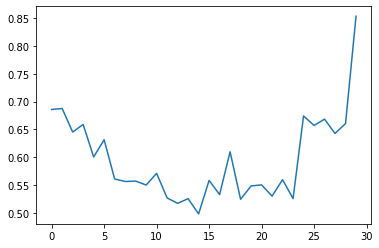

In [ ]:
plt.plot(history.history['val_loss']);

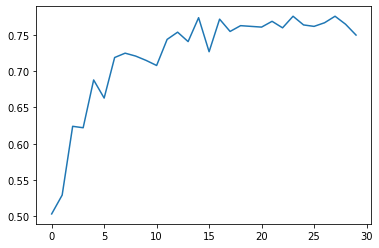

In [ ]:
plt.plot(history.history['val_accuracy']);

In [ ]:
test_dataset.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
predictions = network.predict(test_dataset)
predictions 

array([[9.7465026e-01, 2.5349779e-02],
       [2.5689807e-03, 9.9743098e-01],
       [9.0297014e-01, 9.7029813e-02],
       ...,
       [2.5211761e-05, 9.9997485e-01],
       [4.0803283e-07, 9.9999964e-01],
       [1.2523066e-07, 9.9999988e-01]], dtype=float32)

In [ ]:
predictions = np.argmax(predictions, axis = 1) #extract the index with max value. axis 1 because we want columns
predictions #predicted

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
test_dataset.classes  #test set

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score  #test accuracy
accuracy_score(test_dataset.classes, predictions)

0.75

In [ ]:
test_dataset.class_indices

{'cat': 0, 'dog': 1}

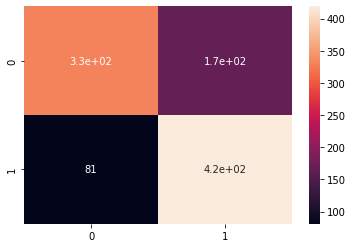

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.80      0.66      0.73       500
           1       0.71      0.84      0.77       500

    accuracy                           0.75      1000
   macro avg       0.76      0.75      0.75      1000
weighted avg       0.76      0.75      0.75      1000



In [ ]:
model_json = network.to_json()
with open('network2.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
network_saved = save_model(network, '/content/weights2.hdf5')

In [ ]:
with open('network2.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 128, 128, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 128, 128, 3], "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2]

In [ ]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights2.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
image = cv2.imread('/content/drive/MyDrive/ComputerVision/4CNN/mydog.jpg')  #now we will upload an iamge and classify it

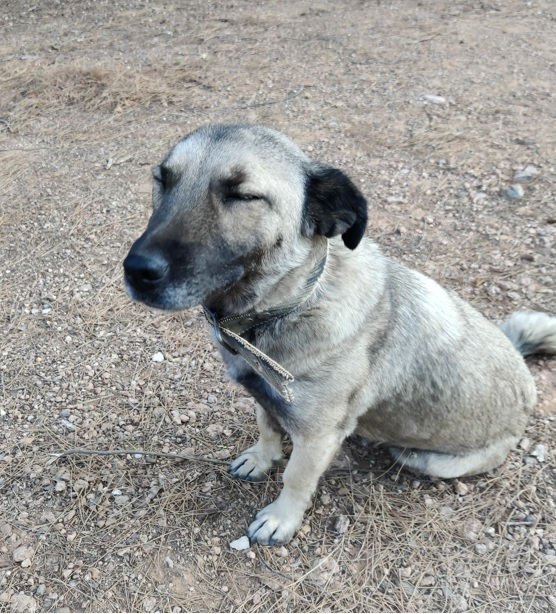

In [ ]:
cv2_imshow(image)

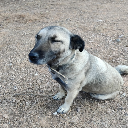

In [ ]:
image = cv2.resize(image, (128, 128)) # need to resize for CNN, CNN expects this size.  increase the CNN input size might increase the accuracy but also increase the time for training
cv2_imshow(image)

In [ ]:
image = image / 255  #scale this image
image

array([[[0.48235294, 0.50196078, 0.51372549],
        [0.41176471, 0.43137255, 0.43921569],
        [0.44705882, 0.46666667, 0.48235294],
        ...,
        [0.67058824, 0.69803922, 0.70980392],
        [0.63137255, 0.65098039, 0.6627451 ],
        [0.64313725, 0.65882353, 0.67058824]],

       [[0.48235294, 0.50196078, 0.51372549],
        [0.51372549, 0.53333333, 0.54509804],
        [0.49019608, 0.50980392, 0.52156863],
        ...,
        [0.7372549 , 0.76078431, 0.78039216],
        [0.65490196, 0.67843137, 0.69803922],
        [0.68627451, 0.70588235, 0.71764706]],

       [[0.55686275, 0.56862745, 0.58431373],
        [0.54117647, 0.56078431, 0.57254902],
        [0.45882353, 0.48235294, 0.49411765],
        ...,
        [0.63921569, 0.65490196, 0.6627451 ],
        [0.6745098 , 0.69411765, 0.70196078],
        [0.65490196, 0.67058824, 0.68235294]],

       ...,

       [[0.55294118, 0.58431373, 0.59607843],
        [0.53333333, 0.56470588, 0.59607843],
        [0.58039216, 0

In [ ]:
image.shape

(128, 128, 3)

In [ ]:
image = image.reshape(-1, 128, 128, 3)  # you can even send more than 1 for example use (10, 64, 64, 3) for 10 images
image.shape

(1, 128, 128, 3)

In [ ]:
result = network_loaded(image)  #predictions, dont worry about scientific notations WHO NEEDS THEM WHEN  WE HAVE IF ELSE STRUCTURE
result

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.01421591, 0.9857841 ]], dtype=float32)>

In [ ]:
result = np.argmax(result) #convert to human readable language!
result

1

In [ ]:
test_dataset.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
if result == 0:
  print('Cat')
else:
  print('Dog')

Dog
